<a href="https://colab.research.google.com/github/Lizzy-TM/Challenges-DScience/blob/main/Challenge2/Challenge2_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 1. Extracción

In [53]:
import pandas as pd
import requests
import json

In [54]:
# URL directa al archivo en modo RAW
url="https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json"
# Descargar el archivo
datos=requests.get(url)
data=datos.json()
# Convertir a DataFrame (si está anidado luego lo normalizamos)
df = pd.json_normalize(data)
# Ver las primeras filas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 🛠 **2. Transformación**

In [55]:
# Información de las columnas
df.info()
# No se tienen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [56]:
#Conociendo las columnas
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [57]:
# Renombrando columnas
import re

# Lista de prefijos a eliminar
prefijos = ['account.', 'customer.', 'internet.', 'phone.']

nuevas_columnas = []
for col in df.columns:
    # 1. Eliminar prefijos si existen
    for pref in prefijos:
        if col.startswith(pref):
            col = col[len(pref):]
            break

    # 2. Convertir CamelCase o espacios a snake_case
    #col = re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower().replace(' ', '_')

    # 3. Cambios específicos
    if col == 'Charges.Monthly':
        col = 'monthly_charges'
    elif col == 'Charges.Total':
        col = 'total_charges'
    elif col == 'customerID':
        col = 'customer_id'
    elif col == 'SeniorCitizen':
        col = 'senior_citizen'
    elif col == 'PhoneService':
        col = 'phone_service'
    elif col == 'multiplelines':
        col = 'multiple_lines'
    elif col == 'InternetService':
        col = 'Internet_service'
    elif col == 'multiplelines':
        col = 'multiple_lines'
    elif col == 'StreamingTV':
        col = 'Streaming_tv'
    nuevas_columnas.append(col)

# Asignar las nuevas columnas
df.columns = nuevas_columnas

# Verificar
print(df.columns)

Index(['customer_id', 'Churn', 'gender', 'senior_citizen', 'Partner',
       'Dependents', 'tenure', 'phone_service', 'MultipleLines',
       'Internet_service', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Streaming_tv', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'monthly_charges',
       'total_charges'],
      dtype='object')


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   senior_citizen    7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   phone_service     7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   Internet_service  7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  Streaming_tv      7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [59]:
# La columna senior_citizen de forma más legible
df['senior_citizen'] = df['senior_citizen'].replace({0: 'No', 1: 'Sí'})

In [60]:
df.head()

,customer_id,Churn,gender,senior_citizen,Partner,Dependents,tenure,phone_service,MultipleLines,Internet_service,...,OnlineBackup,DeviceProtection,TechSupport,Streaming_tv,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,monthly_charges,total_charges
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Sí,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Sí,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [61]:
# Convertir a float total_charges'
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')


# **📦 3. Carga**

In [62]:
# Guardando el DataFrame en CSV sin índice adicional
df.to_csv('datos_limpios.csv', index=False)

# **📊 4. Análisis**
Analizaremos la variable "Churn" desde 2 puntos de vista:

1. Distribución general: para ver el equilibrio entre clientes que se fueron y los que se quedaron.

2. Relaciones con otras variables: para identificar factores que podrían influir en la cancelación.

## **Distribución general**

Esto nos dirá si el conjunto de datos está balanceado o no (muy importante para modelar luego).

In [63]:
# Leemos nuestros datos limpios
df=pd.read_csv('/content/datos_limpios.csv')
df.tail()

,customer_id,Churn,gender,senior_citizen,Partner,Dependents,tenure,phone_service,MultipleLines,Internet_service,...,OnlineBackup,DeviceProtection,TechSupport,Streaming_tv,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,monthly_charges,total_charges
7262,9987-LUTYD,No,Female,No,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,No,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,No,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,No,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-3952172422.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-3952172422.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{counts[i]} ({percentages[i]:.1f}%)", ha="center")


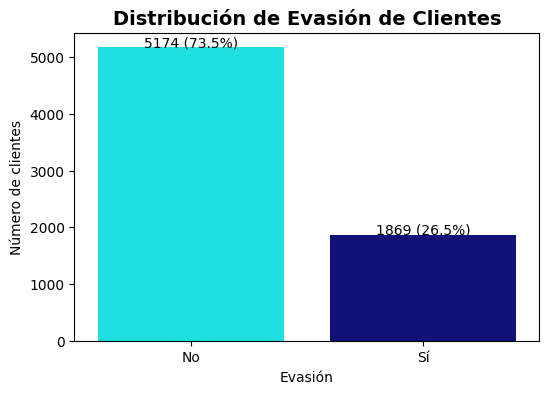

In [65]:
# Conteo de Churn (Evasión)
# Reemplazar valores Yes/No por Sí/No (sin modificar el original)
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].replace({'Yes': 'Sí', 'No': 'No'})
counts = df_plot['Churn'].value_counts()
percentages = df_plot['Churn'].value_counts(normalize=True) * 100

# Gráfico con conteo y etiquetas encima
plt.figure(figsize=(6,4))
ax = sns.countplot(
    data=df_plot,
    x='Churn',
    palette={'Sí': 'darkblue', 'No': 'cyan'}
)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 10,
             f"{counts[i]} ({percentages[i]:.1f}%)", ha="center")

# Títulos y etiquetas
plt.title('Distribución de Evasión de Clientes', fontsize=14, fontweight='bold')
plt.xlabel('Evasión')
plt.ylabel('Número de clientes')
plt.show()

# Porcentaje
#print(df_plot['Churn'].value_counts(normalize=True) * 100)

**Interpretación:**

Distribución general de Evación
Aproximadamente 26.5% de los clientes han abandonado la empresa, mientras que el 73.5% permanece activo.

Este nivel de Evasión es significativo y sugiere que las causas deben ser investigadas para reducir pérdidas.

## **Relacion con otras variables**

Aquí buscamos patrones, por ejemplo: ¿los clientes sin contrato fijo se van más?

📌 Variables recomendadas para este análisis:

contract (contrato)

internet_service (tipo de internet)

payment_method (método de pago)

paperless_billing (facturación electrónica)

senior_citizen (edad ≥ 65)

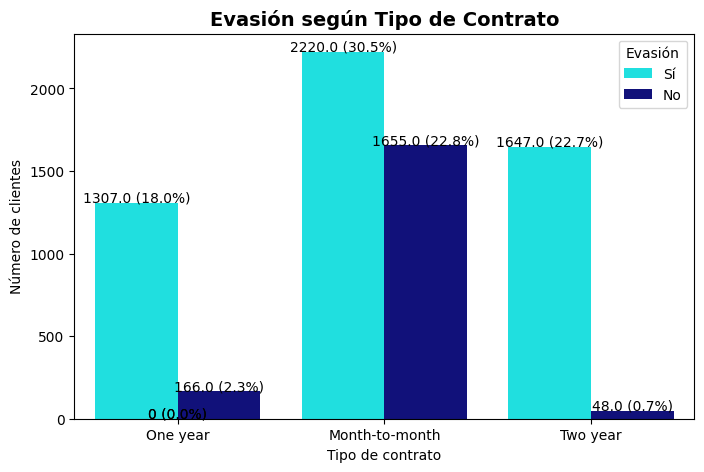

In [66]:

# Evasió según Contrato

# Copia para no modificar el DataFrame original
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].replace({'Sí': 'Sí', 'No': 'No'})
counts = df_plot['Churn'].value_counts()
percentages = df_plot['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_plot, x='Contract', hue='Churn',
                   palette={'Yes':'darkblue', 'No':'cyan'})

# Cambiar leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Sí', 'No'], title='Evasión')

plt.title('Evasión según Tipo de Contrato', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')

# Mostrar valores y porcentajes sobre cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f"{height} ({percentage:.1f}%)", ha="center")

plt.show()


**Evasión según tipo de contrato**

Los clientes con contratos mensuales muestran una tasa de evasión muy superior a los de contratos a 1 o 2 años.

Los contratos a largo plazo parecen actuar como un mecanismo de retención.

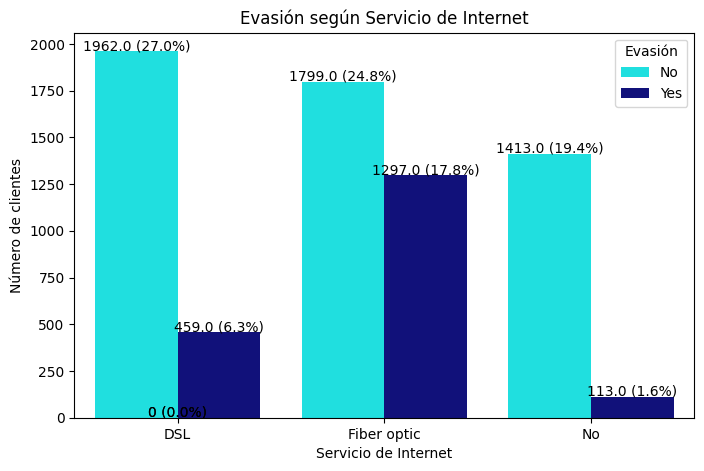

In [67]:
# Evasión según servicio de Internet

df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].replace({'Sí': 'Sí', 'No': 'No'})
#df_plot['Internet_service'] = df_plot['Internet_service'].replace({'Sí': 'Mayor 65 años', 'No': 'Menor a 65 años'})

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_plot, x='Internet_service', hue='Churn',
                   palette={'Yes':'darkblue', 'No':'cyan'})

# Cambiar título de la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Evasión')

plt.title('Evasión según Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Número de clientes')

# Mostrar valores y porcentajes
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f"{height} ({percentage:.1f}%)", ha="center")

plt.show()



**Evasión según servicio de Internet**

Los clientes con Fibra Óptica tienen tasas de churn más altas que aquellos con DSL o sin Internet.

Esto podría indicar problemas de servicio o de precio en este tipo de conexión.

Quienes no tienen internet, practicamente no se van

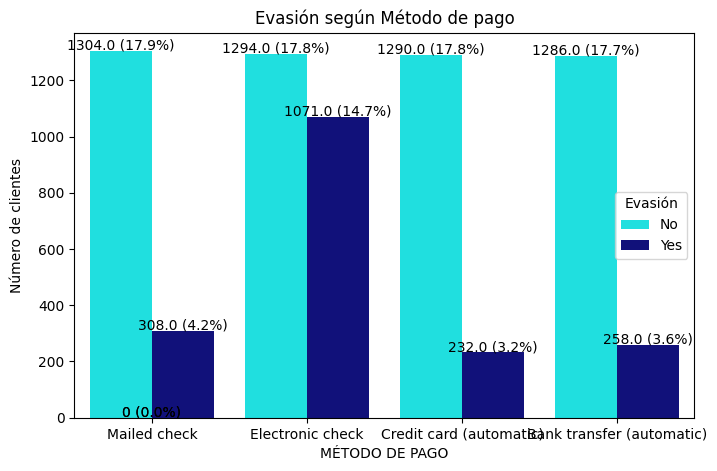

In [68]:
# Evasión según Método de pago

df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].replace({'Sí': 'Sí', 'No': 'No'})
#df_plot['Internet_service'] = df_plot['Internet_service'].replace({'Sí': 'Mayor 65 años', 'No': 'Menor a 65 años'})

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_plot, x='PaymentMethod', hue='Churn',
                   palette={'Yes':'darkblue', 'No':'cyan'})

# Cambiar título de la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Evasión')

plt.title('Evasión según Método de pago')
plt.xlabel('MÉTODO DE PAGO')
plt.ylabel('Número de clientes')

# Mostrar valores y porcentajes
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f"{height} ({percentage:.1f}%)", ha="center")

plt.show()


**Evasión según método de pago**

Pago electrónico automático y tarjeta de crédito presentan tasas de churn relativamente menores.

Pagos con factura por correo tienen mayor churn, posiblemente por clientes menos comprometidos o con menor fidelidad.

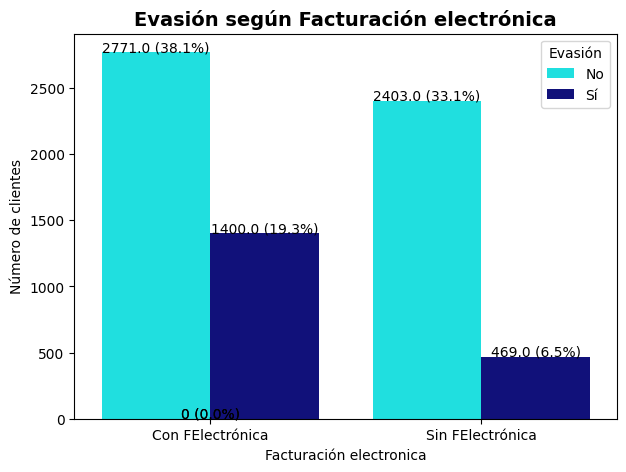

In [69]:
# Ejemplo con Facturación electrónica (paperless_billing )

# Copia para no modificar el DataFrame original
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].replace({'Yes': 'Sí', 'No': 'No'})
df_plot['PaperlessBilling'] = df_plot['PaperlessBilling'].replace({'Yes': 'Con FElectrónica', 'No': 'Sin FElectrónica'})
plt.figure(figsize=(7,5))
ax = sns.countplot(
    data=df_plot,
    x='PaperlessBilling',
    hue='Churn',
    palette={'Sí': 'darkblue', 'No': 'cyan'}
)
# Mostrar valores y porcentajes sobre cada barra
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f"{height} ({percentage:.1f}%)", ha="center")



plt.title('Evasión según Facturación electrónica', fontsize=14, fontweight='bold')
plt.xlabel('Facturación electronica')
plt.ylabel('Número de clientes')

# Cambiar título de la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Evasión')

plt.show()

**Interpretación**

Quienes usan facturación electrónica (paperlessbilling) muestran mayor evasión; sugiere revisar experiencia digital.

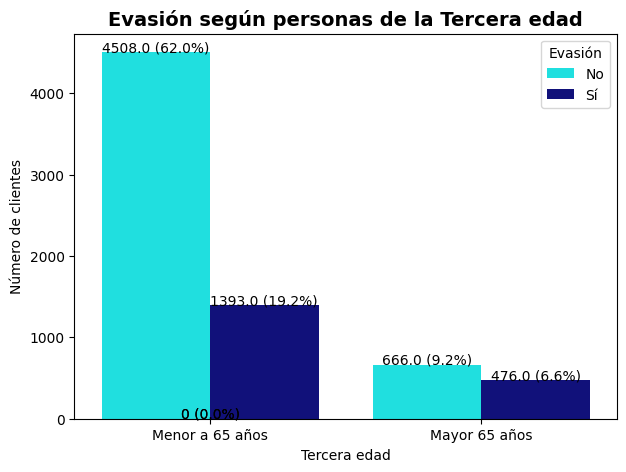

In [ ]:
# Ejemplo con Tercera edad (senior_citizen )

# Copia para no modificar el DataFrame original
df_plot = df.copy()
df_plot['Churn'] = df_plot['Churn'].replace({'Yes': 'Sí', 'No': 'No'})
df_plot['senior_citizen'] = df_plot['senior_citizen'].replace({'Sí': 'Mayor 65 años', 'No': 'Menor a 65 años'})

plt.figure(figsize=(7,5))
ax = sns.countplot(
    data=df_plot,
    x='senior_citizen',
    hue='Churn',
    palette={'Sí': 'darkblue', 'No': 'cyan'}
)

plt.title('Evasión según personas de la Tercera edad', fontsize=14, fontweight='bold')
plt.xlabel('Tercera edad')
plt.ylabel('Número de clientes')
# Mostrar valores y porcentajes
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f"{height} ({percentage:.1f}%)", ha="center")

# Cambiar título de la leyenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Evasión')


plt.show()

**Interpretación**
Las personas menores de 65 años tienen mayor evasión, lo que sugiere concentrarse en este grupo etario, ofreciendoles beneficios más que solo descuentos.

## **Variables numéricas**

/tmp/ipython-input-1617349462.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure',


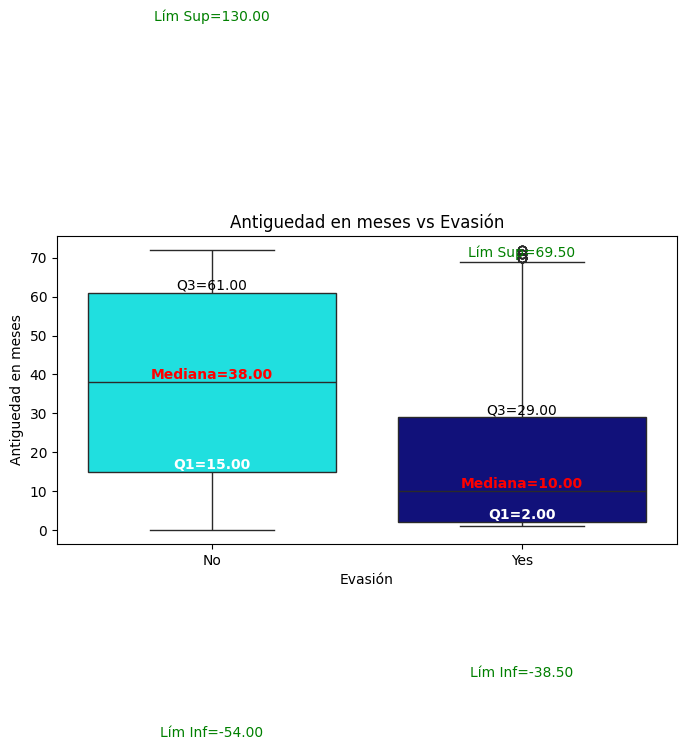

In [86]:
# Calcular estadísticos por grupo de Evasion y Antiguedad en meses
stats = df.groupby('Churn')['tenure'].describe()

# Calcular IQR y límites superior/inferior
iqr = stats['75%'] - stats['25%']
lim_inf = stats['25%'] - 1.5 * iqr
lim_sup = stats['75%'] + 1.5 * iqr

# Crear boxplot
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='tenure',
            palette={'Yes':'darkblue', 'No':'cyan'})

# Anotaciones por cada categoría de Churn
for i, churn_val in enumerate(stats.index):
    q1 = stats.loc[churn_val, '25%']
    q3 = stats.loc[churn_val, '75%']
    median = stats.loc[churn_val, '50%']
    li = lim_inf.loc[churn_val]
    ls = lim_sup.loc[churn_val]

    # Dibujar etiquetas
    plt.text(i, q1, f'Q1={q1:.2f}', ha='center', va='bottom', fontweight='bold', color='white')
    plt.text(i, q3, f'Q3={q3:.2f}', ha='center', va='bottom', color='black')
    plt.text(i, median, f'Mediana={median:.2f}', ha='center', va='bottom', fontweight='bold', color='red')
    plt.text(i, li, f'Lím Inf={li:.2f}', ha='center', va='bottom', color='green')
    plt.text(i, ls, f'Lím Sup={ls:.2f}', ha='center', va='bottom', color='green')

plt.title('Antiguedad en meses vs Evasión')
plt.xlabel('Evasión')
plt.ylabel('Antiguedad en meses')
plt.show()
# Ejemplo con Método de pago



**Conclusión (Antiguedad en meses vs Evasión)**

Los clientes con menor tiempo de permanencia (tenure) tienen más probabilidades de abandonar.

/tmp/ipython-input-3700552880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='monthly_charges',


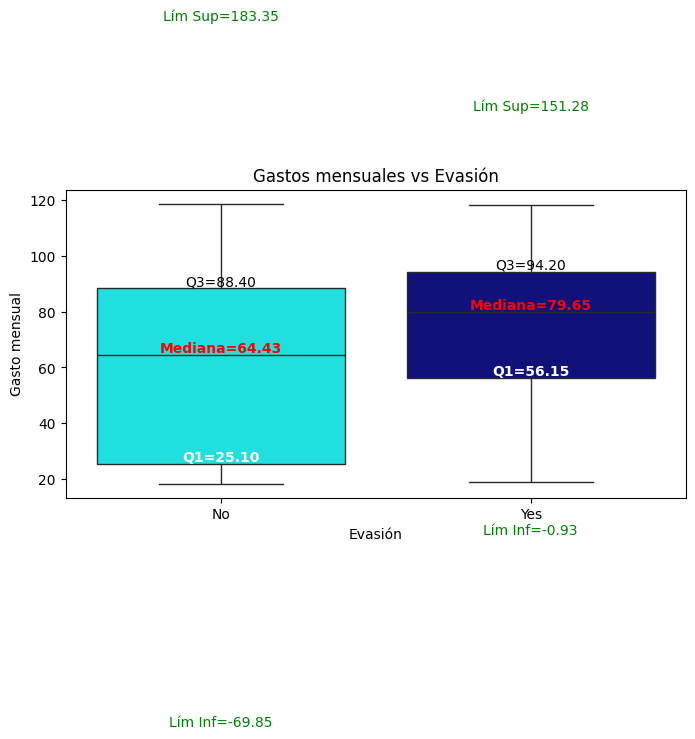

In [87]:
# Calcular estadísticos por grupo de Evasion y Gasto mensual
stats = df.groupby('Churn')['monthly_charges'].describe()

# Calcular IQR y límites superior/inferior
iqr = stats['75%'] - stats['25%']
lim_inf = stats['25%'] - 1.5 * iqr
lim_sup = stats['75%'] + 1.5 * iqr

# Crear boxplot
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='monthly_charges',
            palette={'Yes':'darkblue', 'No':'cyan'})

# Anotaciones por cada categoría de Churn
for i, churn_val in enumerate(stats.index):
    q1 = stats.loc[churn_val, '25%']
    q3 = stats.loc[churn_val, '75%']
    median = stats.loc[churn_val, '50%']
    li = lim_inf.loc[churn_val]
    ls = lim_sup.loc[churn_val]

    # Dibujar etiquetas
    plt.text(i, q1, f'Q1={q1:.2f}', ha='center', va='bottom',fontweight='bold', color='white')
    plt.text(i, q3, f'Q3={q3:.2f}', ha='center', va='bottom', color='black')
    plt.text(i, median, f'Mediana={median:.2f}', ha='center', va='bottom', fontweight='bold', color='red')
    plt.text(i, li, f'Lím Inf={li:.2f}', ha='center', va='bottom', color='green')
    plt.text(i, ls, f'Lím Sup={ls:.2f}', ha='center', va='bottom', color='green')

plt.title('Gastos mensuales vs Evasión')
plt.xlabel('Evasión')
plt.ylabel('Gasto mensual')
plt.show()

**Conclusión (Evasion y Cargo mensual)**

Los clientes con cargos mensuales más altos tienden a estar más representados en el grupo que sí evadió.

Esto podría indicar que tarifas elevadas aumentan la probabilidad de evasión.

La dispersión de cargos es mayor en el grupo “No” (Q1 a Q3 más amplio) que en el grupo “Yes”.

/tmp/ipython-input-2879292812.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='total_charges',


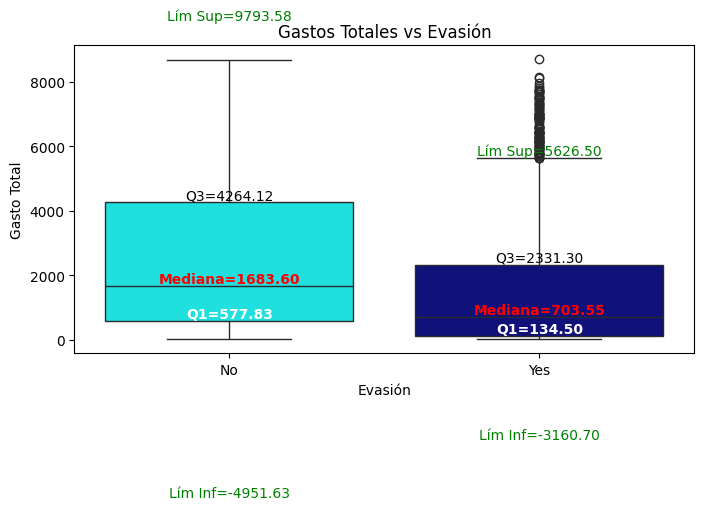

In [88]:
# Calcular estadísticos por grupo de Evasion y Gasto Total
stats = df.groupby('Churn')['total_charges'].describe()

# Calcular IQR y límites superior/inferior
iqr = stats['75%'] - stats['25%']
lim_inf = stats['25%'] - 1.5 * iqr
lim_sup = stats['75%'] + 1.5 * iqr

# Crear boxplot
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='total_charges',
            palette={'Yes':'darkblue', 'No':'cyan'})

# Anotaciones por cada categoría de Churn
for i, churn_val in enumerate(stats.index):
    q1 = stats.loc[churn_val, '25%']
    q3 = stats.loc[churn_val, '75%']
    median = stats.loc[churn_val, '50%']
    li = lim_inf.loc[churn_val]
    ls = lim_sup.loc[churn_val]

    # Dibujar etiquetas
    plt.text(i, q1, f'Q1={q1:.2f}', ha='center', va='bottom',fontweight='bold', color='white')
    plt.text(i, q3, f'Q3={q3:.2f}', ha='center', va='bottom', color='black')
    plt.text(i, median, f'Mediana={median:.2f}', ha='center', va='bottom', fontweight='bold', color='red')
    plt.text(i, li, f'Lím Inf={li:.2f}', ha='center', va='bottom', color='green')
    plt.text(i, ls, f'Lím Sup={ls:.2f}', ha='center', va='bottom', color='green')

plt.title('Gastos Totales vs Evasión')
plt.xlabel('Evasión')
plt.ylabel('Gasto Total')
plt.show()

**Interpretacion**

Los clientesacumulan acumulan más pagos y con más tiempo tienden a quedarse.

# **Mapa de Correlación Numérica**

Para saber qué variables numéricas tienen más relación con Churn (Evasión)

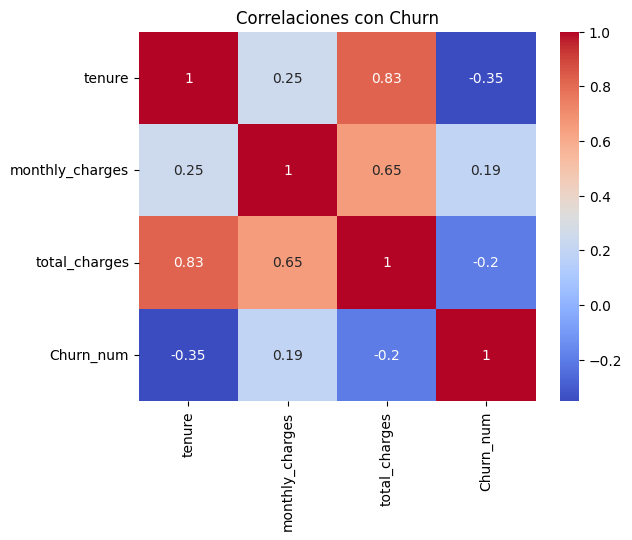

In [ ]:
# Convertir Churn a numérico (1=Sí, 0=No)
df['Churn_num'] = df['Churn'].map({'Yes': 1, 'No': 0})

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlaciones con Evasión')
plt.show()

**Interpretación del mapa de calor de correlaciones con**

**Churn-tenure (-0.35 con Churn(Evasión))**

Existe una correlación negativa moderada, lo que significa que a mayor tiempo como cliente, menor es la probabilidad de evasión. En otras palabras, los clientes más antiguos tienden a permanecer en la empresa.

**monthly_charges(Gastos mensuales) (0.19 con Churn(Evasión))**

La correlación es positiva pero débil: los clientes con cargos mensuales más altos tienen una ligera tendencia a abandonar el servicio, aunque no es un factor tan determinante como la permanencia.

**total_charges(Gastos totales) (-0.20 con Churn(Evasión))**

Hay una correlación negativa débil: clientes con cargos totales acumulados más altos tienden a quedarse más, lo cual es lógico ya que generalmente coincide con un mayor tiempo como cliente.

**Relaciones entre variables independientes**

**tenure(tiempo de premanencia en meses) y total_charges tienen una correlación muy alta (0.83)**,

 Lo cual indica que el cargo total está fuertemente influenciado por el tiempo de permanencia.

**monthly_charges y total_charges**

También tienen correlación positiva alta (0.65), mostrando que un mayor cargo mensual eleva naturalmente el cargo total.

**tenure(tiempo de premanencia en meses) y monthly_charges tienen correlación baja (0.25)**,

Lo que sugiere que el tiempo en la empresa no necesariamente está relacionado con cuánto paga el cliente mensualmente.



# **📝 Informe final**

**Informe de resultados**

Introducción

El objetivo de este análisis fue comprender cómo las variables numéricas clave se relacionan con la evasión de clientes (Churn) en una empresa de telecomunicaciones. Utilizando un mapa de calor de correlaciones, se buscó identificar patrones que indiquen posibles factores de riesgo para la pérdida de clientes.

**Resultados clave**

Mayor tiempo de permanencia (tenure) reduce el riesgo de evasión.

Cargos mensuales elevados (monthly_charges) tienen una ligera asociación con mayor evasión, aunque su impacto no es tan fuerte.

Cargos totales acumulados (total_charges) muestran que clientes con mayor historial de facturación tienden a ser más leales.

Las variables tenure y total_charges están fuertemente relacionadas, lo que implica que en el modelado predictivo podría evaluarse evitar usar ambas simultáneamente para prevenir multicolinealidad.

**Conclusiones**

La retención debería enfocarse especialmente en clientes nuevos (bajo tenure), ya que son más propensos a abandonar.

Programas de fidelización podrían ser efectivos para reducir la evasión temprana.

Aunque los cargos mensuales altos no tienen una correlación fuerte, podrían combinarse con otras variables para identificar clientes en riesgo.

